#### Getting the current value from some currencies (all values that follow are in respect to BRL)

In [1]:
import requests 
import json
cotacoes = requests.get('https://economia.awesomeapi.com.br/json/all') #Request all currencies info from today
cotacoes_dic = cotacoes.json() #Locating the json from the request as a dictionary
print(cotacoes_dic) #Taking a look at what the dictionary looks like

{'USD': {'code': 'USD', 'codein': 'BRL', 'name': 'Dólar Americano/Real Brasileiro', 'high': '5.3658', 'low': '5.3154', 'varBid': '-0.0477', 'pctChange': '-0.89', 'bid': '5.3173', 'ask': '5.318', 'timestamp': '1669723366', 'create_date': '2022-11-29 09:02:46'}, 'USDT': {'code': 'USD', 'codein': 'BRLT', 'name': 'Dólar Americano/Real Brasileiro Turismo', 'high': '5.39', 'low': '5.39', 'varBid': '0', 'pctChange': '0', 'bid': '5.23', 'ask': '5.55', 'timestamp': '1669672803', 'create_date': '2022-11-28 19:00:03'}, 'CAD': {'code': 'CAD', 'codein': 'BRL', 'name': 'Dólar Canadense/Real Brasileiro', 'high': '4.0016', 'low': '3.953', 'varBid': '-0.0199', 'pctChange': '-0.5', 'bid': '3.9532', 'ask': '3.9552', 'timestamp': '1669723364', 'create_date': '2022-11-29 09:02:44'}, 'GBP': {'code': 'GBP', 'codein': 'BRL', 'name': 'Libra Esterlina/Real Brasileiro', 'high': '6.4736', 'low': '6.3899', 'varBid': '-0.0204', 'pctChange': '-0.32', 'bid': '6.3917', 'ask': '6.3952', 'timestamp': '1669723370', 'crea

#### Getting the latest available prices for USD, EUR and BTC

In [13]:
#from what we could see on the previous dictionary the sub-key 'bid' gives us the latest available price for any given currency.
dollar = float(cotacoes_dic['USD']['bid']) #Let's set the value type to float in case we may want to perform arithmetics with the values
print(f'The latest price of 1 Dollar is {dollar} BRL.')
euro = float(cotacoes_dic['EUR']['bid'])
print(f'The latest price of 1 Euro is {euro} BRL.')
bitcoin = float(cotacoes_dic['BTC']['bid'])*1000 #BTC bid value was set with the decimal separator between the thousands and hundreds places, so wee need to multiply by 1000 to get a correct value
print(f'The latest price of 1 Bitcoin is {bitcoin} BRL.')

The latest price of 1 Dollar is 5.3173 BRL.
The latest price of 1 Euro is 5.518 BRL.
The latest price of 1 Bitcoin is 88134.0 BRL.


#### Gettig the average price of 1 dollar over the last 30 days.

In [17]:
dollar_30days = requests.get('https://economia.awesomeapi.com.br/json/daily/USD-BRL/30') #Let's use this request URL now
dollar_30days = dollar_30days.json()
print(dollar_30days) #Once again lets take a peek at what this dictionary looks like
len(dollar_30days) #Checking the lenght of the dictionary we see we have 30 different components, as expected

[{'code': 'USD', 'codein': 'BRL', 'name': 'Dólar Americano/Real Brasileiro', 'high': '5.3658', 'low': '5.3658', 'varBid': '0', 'pctChange': '0', 'bid': '5.3654', 'ask': '5.3663', 'timestamp': '1669672803', 'create_date': '2022-11-28 19:00:03'}, {'high': '5.4293', 'low': '5.3495', 'varBid': '0.0004', 'pctChange': '0.01', 'bid': '5.3654', 'ask': '5.3663', 'timestamp': '1669672532'}, {'high': '5.4238', 'low': '5.3059', 'varBid': '0.0892', 'pctChange': '1.68', 'bid': '5.4098', 'ask': '5.4103', 'timestamp': '1669413596'}, {'high': '5.4238', 'low': '5.3059', 'varBid': '0.0892', 'pctChange': '1.68', 'bid': '5.4098', 'ask': '5.4103', 'timestamp': '1669413566'}, {'high': '5.3213', 'low': '5.3213', 'varBid': '0.0005', 'pctChange': '0.01', 'bid': '5.3208', 'ask': '5.3218', 'timestamp': '1669334366'}, {'high': '5.3596', 'low': '5.3596', 'varBid': '0.0005', 'pctChange': '0.01', 'bid': '5.3591', 'ask': '5.3601', 'timestamp': '1669247416'}, {'high': '5.3991', 'low': '5.2817', 'varBid': '0.0005', 'pct

30

In [20]:
#Let's set a for loop to detemrine the average value throughout the last 30 days
total = 0 
for item in dollar_30days:
    total += float(item['bid']) #sum all values available
dol_avg = total/len(dollar_30days) #average them out
print(f'The average value of 1 dollar over the last 30 days is {round(dol_avg,2)} BRL')

The average value of 1 dollar over the last 30 days is 5.29 BRL


#### Getting all BitCoin values from Jan/20 to Out/20

In [29]:
#Same process as before, but now using a different URL request for specific time periods
btc_jan_to_oct = requests.get('https://economia.awesomeapi.com.br/json/daily/BTC-BRL/302?start_date=20200101&end_date=20201031')
btc_jan_to_oct_dic = btc_jan_to_oct.json()
btc_values = [float(item['bid']) for item in btc_jan_to_oct_dic]
print(btc_values)
print(len(btc_values))
#We get 302 distinct values for BTC over the described period

[79401.1, 78101.0, 77950.2, 76550.1, 77888.1, 73685.5, 73200.0, 73300.0, 72202.4, 72251.2, 71401.0, 66952.4, 66000.3, 64950.1, 64500.0, 64400.0, 65000.0, 64100.6, 63601.7, 63558.3, 62701.0, 62747.2, 61960.0, 61211.5, 60265.0, 59801.0, 60210.3, 60569.2, 60018.1, 60512.5, 60390.7, 60950.1, 60995.0, 60600.1, 59638.4, 59720.5, 59845.0, 59501.1, 57884.0, 57880.5, 57050.6, 59100.0, 59750.0, 59285.0, 57807.2, 58250.0, 57700.0, 56908.9, 55566.0, 55856.7, 55821.2, 55511.0, 55059.1, 54348.3, 55102.2, 55550.3, 54555.7, 56500.0, 55336.6, 61939.0, 64900.0, 64200.0, 63350.9, 62700.0, 63016.2, 63599.9, 64655.2, 63606.0, 66360.9, 66100.0, 66112.0, 65657.4, 66655.0, 65800.0, 66453.3, 67501.0, 64270.3, 64280.0, 63905.0, 63210.3, 63120.0, 62300.0, 65303.8, 63700.0, 63715.0, 63140.0, 63302.0, 61902.2, 59951.0, 59800.0, 58296.3, 61298.1, 58950.0, 57330.0, 57490.0, 56161.0, 55300.0, 50402.0, 50400.2, 49951.1, 49850.0, 49321.0, 49143.0, 49516.5, 49680.0, 49651.8, 49702.1, 49320.0, 49868.0, 50073.4, 50041.3, 

#### Plotting the BTC-BRL value over Jan/20 to Oct/20

<function matplotlib.pyplot.show(close=None, block=None)>

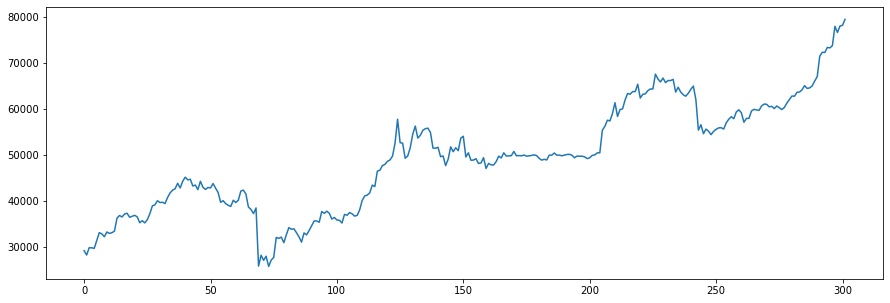

In [32]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,5))
#By default the API return us the requested values in last to first order, so we need to reverse the values in our list
plt.plot(btc_values[::-1])
plt.show